## Example 1

In [1]:
import pydotplus

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from IPython.display import Image, display

In [3]:
def load_dataset():
  return load_iris()

def train_model(iris):

  clf = tree.DecisionTreeClassifier(criterion="gini")
  clf = clf.fit(iris.data, iris.target)
  return clf

def display_image(clf, data, target_names, feature_names):

  dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_names,
                                  class_names=target_names,
                                  filled=True,
                                  rounded=True)
  graph = pydotplus.graph_from_dot_data(dot_data)
  display(Image(data=graph.create_png()))


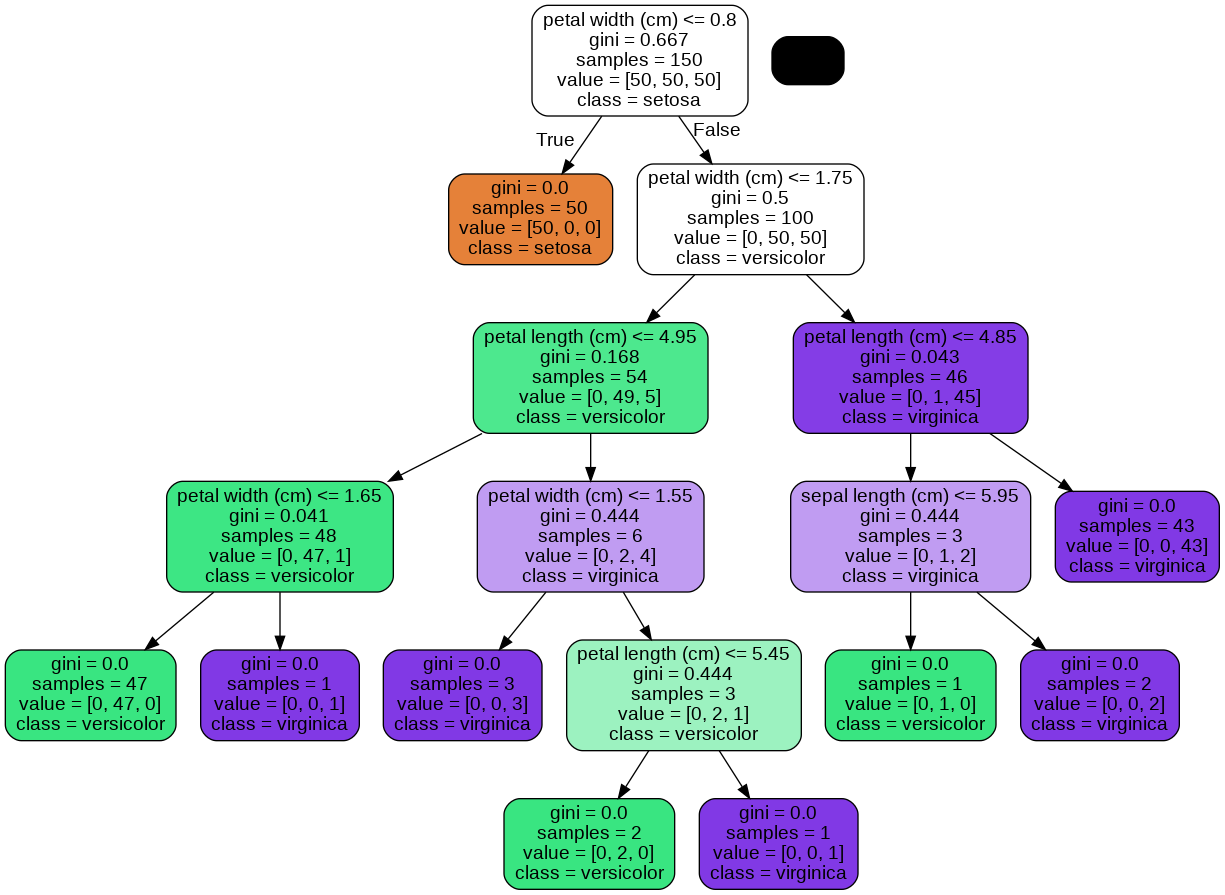

In [4]:
if __name__ == '__main__':
  iris_data = load_iris()
  desicion_tree_classifier = train_model(iris_data)
  display_image(clf=desicion_tree_classifier, data=iris_data, target_names=iris_data.target_names, feature_names=iris_data.feature_names)

## Example 2

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [6]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
# kaggle datasets for a purchase prediction

df = pd.read_csv('gdrive/My Drive/data/datasets/suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


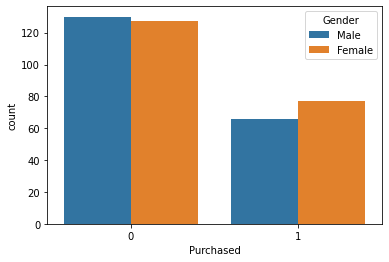

In [9]:
sns.countplot(x='Purchased', hue='Gender', data=df)

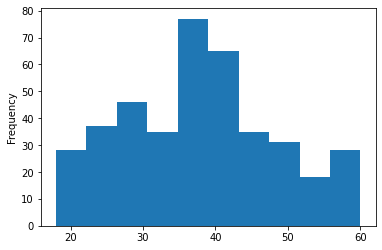

In [10]:
df['Age'].plot.hist()

In [11]:
df.groupby(by='Purchased').median()

,User ID,Age,EstimatedSalary
Purchased,,,
0,15693264.0,34.0,61000.0
1,15694829.0,47.0,90000.0


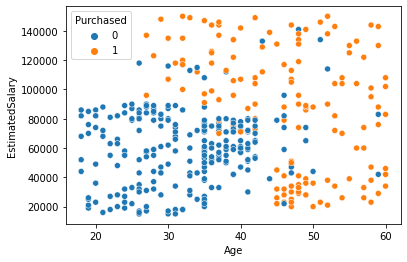

In [12]:
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df)

In [13]:
X = df.iloc[:, [2,3]].values
y = df['Purchased'].values

In [14]:
X[:10], y[:10]

(array([[    19,  19000],
        [    35,  20000],
        [    26,  43000],
        [    27,  57000],
        [    19,  76000],
        [    27,  58000],
        [    27,  84000],
        [    32, 150000],
        [    25,  33000],
        [    35,  65000]]), array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0]))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [18]:
y_pred = clf.predict(X_test)

In [19]:
accuracy_score(y_test, y_pred)

0.85

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  8],
       [10, 37]])

18 observations were classified as false.

### Detailed Visualization

In [21]:
from matplotlib.colors import ListedColormap
import numpy as np

In [22]:
X_set, y_set = X_test, y_test

In [23]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min()-1,
                               stop = X_set[:, 0].max()+1,
                               step = 0.01),
                     np.arange(start = X_set[:, 1].min()-1,
                               stop = X_set[:, 1].max()+1,
                               step = 0.01)
                     )

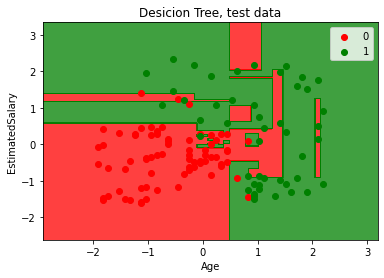

In [24]:
plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(("red", "green")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max()) 
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
              c=ListedColormap(("red", "green"))(i), label=j)
  
plt.title("Desicion Tree, test data")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.legend()
plt.show()

In [25]:
# try to improve model reducung depth
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train
clf = clf.fit(X_train,y_train)
# Predict on test data
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred, )}")

Accuracy: 0.9333333333333333


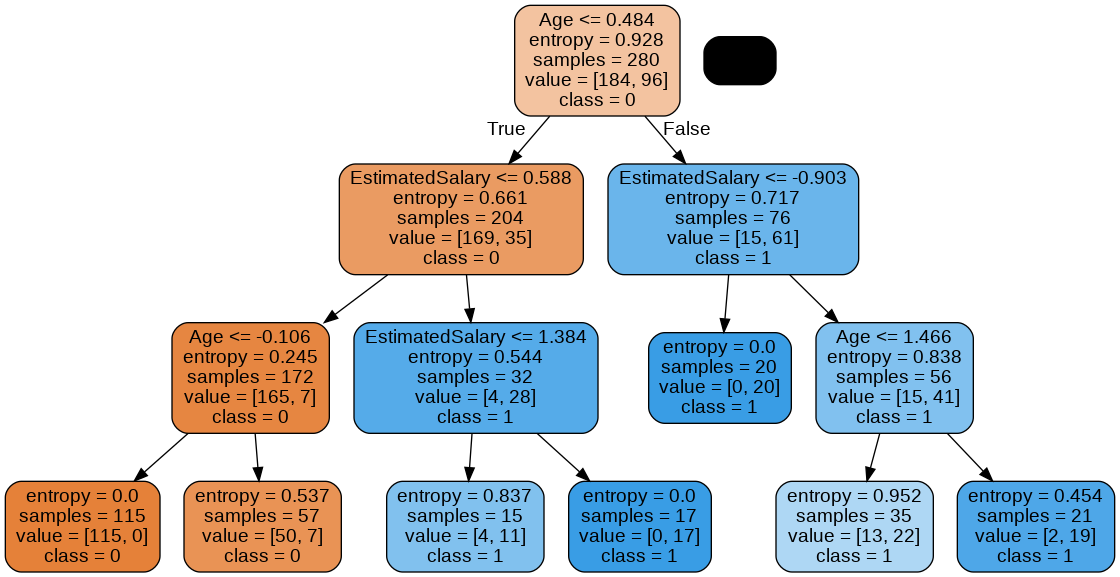

In [26]:
display_image(clf=clf, data=y_pred, feature_names=['Age','EstimatedSalary'], target_names=['0', '1'])